<a href="https://colab.research.google.com/github/george-kan/fastai/blob/main/Chapter2/Chapter_2_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
!pip install git+https://github.com/Joeclinton1/google-images-download.git


     |████████████████████████████████| 727kB 13.3MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 194kB 52.1MB/s 
     |████████████████████████████████| 1.2MB 53.7MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-_4ae9qk_
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-_4ae9qk_
     |████████████████████████████████| 911kB 18.6MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15792 sha256=0821c0518eff06e7c33a5eeb7ac2e3f0d5541fcdf00924f4823de27a2e675a3d
  Stored in directory: /tmp/pip-ephem-wheel-cache-_muot5cy/wheels/1a/36/c9/53bd827bc241b69fe47b90731625459627f82694ecd8a88273
Successfully built google-images-download


In [2]:
from fastai.vision.all import *
from fastbook import *

In [3]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"polar bear,grizzly bear,black bear,teddy bear","limit":100,"print_urls":False}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images


Item no.: 1 --> Item name = polar bear
Evaluating...
Starting Download...
Completed Image ====> 1.polar_bear_on_ice_in_svalbard_norway_ww294883.jpg
Completed Image ====> 2.387489f1b8413ff360c3eead07c710621c-polar-bears.rsquare.w1200.jpg
Completed Image ====> 3.1340901-polar-bear-churchill.jpg
Completed Image ====> 4.mammal_polar_bear_cubs_fighting_alaska_michael_henry_600x300.ashx.jpg
Completed Image ====> 5.polar_bear_with_cubs_in_wapusk_ww266666.jpg
Completed Image ====> 6.84081_nor20200720bearafp_1595259311962.jpeg
Completed Image ====> 7.polar_bear_-_alaska_%28cropped%29.jpg
Completed Image ====> 8.polar-bear-7.jpg
Completed Image ====> 9.0_polar-bear-carries-the-head-of-a-polar-bear-cub-2009.jpg
Completed Image ====> 10.janet-the-polar-bear-nanuk-polar-bear-lodge-george-turner-photo.jpg
Completed Image ====> 11.200720030735-01-polar-bear-svalbard-0709-large-169.jpg
Completed Image ====> 12.ct_110915-23.jpg
Completed Image ====> 13.maxresdefault.jpg
Completed Image ====> 14.5e4c67

In [4]:
images = paths[0]

data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(128, min_scale = 0.3),
        transforms.ToTensor()])

train_x = []
train_y = []
for bear, pictures in images.items():
    train_x += [data_transforms(Image.open(x)) for x in pictures]
    train_y += [bear]*len(pictures)

NameError: ignored

In [ ]:
images = paths[0]
train_x = []
train_y = []
for bear, pictures in images.items():
    train_x += [x for x in pictures]
    train_y += [bear]*len(pictures)

data_list = list(zip(train_x, train_y))

In [ ]:
data_list[200]

In [4]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
    get_y = parent_label,
    item_tfms=Resize(128)
)

In [ ]:
dls = bears.dataloaders('/content/downloads/')

In [ ]:
dls.valid.show_batch(max_n = 4, nrows = 1)

In [ ]:
bears = bears.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult = 2))
dls = bears.dataloaders('/content/downloads/', bs = 5)
dls.train.show_batch(max_n = 8, nrows = 2, unique = False)

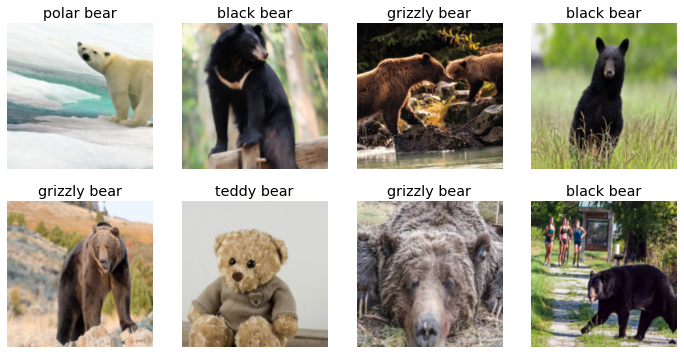

In [5]:
bears = bears.new(item_tfms = RandomResizedCrop(224, min_scale = 0.5), batch_tfms = aug_transforms())
dls = bears.dataloaders('/content/downloads/', bs = 40)
dls.train.show_batch(max_n = 8, nrows = 2, unique = False)

In [6]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


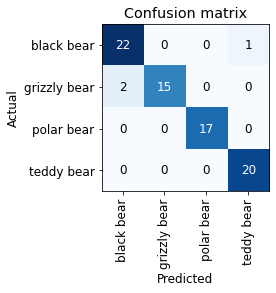

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [8]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [10]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

FileNotFoundError: ignored

In [11]:
bears = bears.new(item_tfms = RandomResizedCrop(224, min_scale = 0.5), batch_tfms = aug_transforms())
dls = bears.dataloaders('/content/downloads/', bs = 50)
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

In [12]:
learn.export()
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [14]:
learn_inf = load_learner(path/'export.pkl')

In [15]:
learn_inf.dls.vocab

['black bear', 'grizzly bear', 'polar bear', 'teddy bear']

In [16]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [17]:
img = PILImage.create(btn_upload.data[-1])

IndexError: ignored

In [18]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128, 128))
out_pl

Output()

In [19]:
pred,pred_idx,probs = learn_inf.predict(img)

NameError: ignored

In [20]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

NameError: ignored

In [21]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [26]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_run.on_click(on_click_classify)

In [27]:
VBox([widgets.Label('Select your bear'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [28]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.9MB 4.3MB/s 
     |████████████████████████████████| 194kB 17.6MB/s 
     |████████████████████████████████| 552kB 17.9MB/s 
     |████████████████████████████████| 112kB 24.5MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 430kB 20.4MB/s 
     |████████████████████████████████| 102kB 8.4MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=6d7ced953f9a44a5bc9ecaf239adef7b6ce5a6a56a941b10fe4d465f0fd1383d
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
ERROR: nbdev 1.1.12 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


In [30]:
from google.colab import files
files.download()

TypeError: ignored

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [32]:
model_save_name = 'bear_classifier.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(learn.state_dict(), path)

In [39]:
learn.export()
path = Path("/content/gdrive/My Drive")